<a href="https://colab.research.google.com/github/SilvestreFer/numpy-workbook/blob/main/Citrus_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🍊 Linear Regression From Scratch Using NumPy**
## Analysis of the Citrus Dataset (Oranges & Grapefruits)

This notebook was created as part of my NumPy studies during the Alura course.  
All tasks were implemented with the goal of understanding:

- How NumPy handles numerical arrays  
- How to compute linear regression using the least squares formula  
- How to generate and analyze random values for parameter estimation  
- How to visualize data using Matplotlib  

The notebook contains the required exercises plus additional analyses added to deepen my understanding.


In [60]:
import numpy as np
import matplotlib.pyplot as plt

### **Loading the Citrus Dataset**

In [61]:
# Load the CSV data from the URL
url = "https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv"

fruit_df = np.loadtxt(
    url,              # Path to the CSV file
    delimiter=",",    # Values are separated by commas
    usecols=np.arange(1, 6, 1),  # Load columns 1 to 5
    skiprows=1        # Skip the header
)

fruit_df

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

###**Separating Oranges and Grapefruits**

The dataset contains 10,000 rows:
- The **first 5,000 rows** correspond to oranges  
- The **last 5,000 rows** correspond to grapefruits  

Extracting:
- diameter
- weight

These variables will be used for regression analysis.

In [62]:
# Separate diameters and weights for oranges and grapefruits

# Oranges: first 5000 rows
orange_diameter = fruit_df[:5000, 0]
orange_weight = fruit_df[:5000, 1]

# Grapefruits: rows 5000 onward
grapefruit_diameter = fruit_df[5000:, 0]
grapefruit_weight = fruit_df[5000:, 1]

###**Visualizing Fruit Measurements**

A simple plot to observe how diameter relates to weight for both fruits.

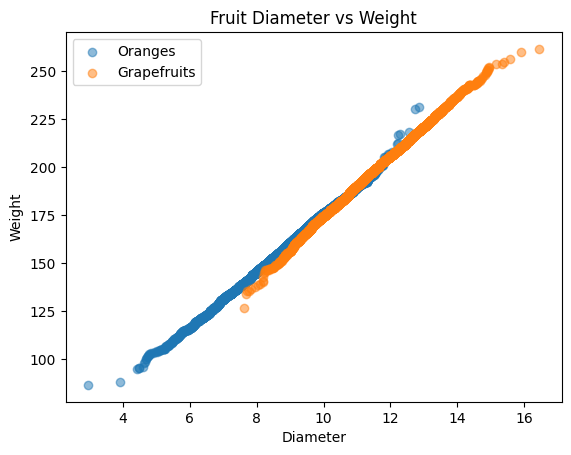

In [63]:
plt.scatter(orange_diameter, orange_weight, label="Oranges", alpha=0.5)
plt.scatter(grapefruit_diameter, grapefruit_weight, label="Grapefruits", alpha=0.5)

plt.xlabel("Diameter")
plt.ylabel("Weight")
plt.title("Fruit Diameter vs Weight")
plt.legend()
plt.show()

### **Manual Linear Regression (Least Squares Formula)**

Computing the regression line, using the analytical formula for:

- **Slope (a)**  
$$a = \frac{n \sum XY - (\sum X)(\sum Y)}{n \sum X^2 - (\sum X)^2}$$

- **Intercept (b)**  
$$b = \bar{Y} - a\bar{X}$$

In [64]:
# Regression for oranges
Y_orange = orange_weight
X_orange = orange_diameter
n_orange = X_orange.size

a_orange = (n * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (n * np.sum(X**2) - (np.sum(X))**2)
b_orange = np.mean(Y) - a_orange * np.mean(X)

a_orange, b_orange

(np.float64(15.70884459360376), np.float64(17.007102876817726))

In [65]:
# Regression for grapefruits
Y_grapefruit = grapefruit_weight
X_grapefruit = grapefruit_diameter
n_grapefruit = X_grapefruit.size

a_grapefruit = (n * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (n * np.sum(X**2) - (np.sum(X))**2)
b_grapefruit = np.mean(Y) - a_grapefruit * np.mean(X)

a_grapefruit, b_grapefruit


(np.float64(15.70884459360376), np.float64(17.007102876817726))

###**Estimating the Slope Using Random Candidate Values**


In [66]:
b = 17  # given intercept
np.random.seed(84)

slopes = np.random.uniform(low=0.0, high=30.0, size=100)
norm_values = np.array([])

# Using grapefruit data (X and Y are already set from the previous cell)
for slope in slopes:
    norm_values = np.append(norm_values, np.linalg.norm(Y - (slope * X + b)))

norm_values

array([11693.67355856,  3756.21335179,  6888.14382259,  2567.04685515,
       11420.77932891,  9623.66917996,  8570.85655292,  6496.51679273,
        2577.28271294,  9613.12064833,  5709.72883857,   695.35964734,
       10855.07029288,  5539.82389583,  3137.98293399,   296.30778902,
        8896.93668493,  8347.82090288, 10206.95670568, 10229.7542583 ,
        2193.54863897,  8448.39951623, 11004.80458021, 11563.3388543 ,
        4098.18752189,  7732.70842098,  2801.84736004,  7688.60780777,
       11134.73586307,  9432.12778879,   725.4664674 ,  6290.36141277,
        5189.67184491,  4716.99608173,  9250.47142251,  7274.49676931,
        8876.20611799,   621.16747277,  4716.1854569 ,  8050.51001798,
        9238.31227388,  3992.98429323, 11531.1764187 ,  5849.11139809,
        1042.57303406,  9875.3710071 , 11759.24152592,  8956.15615033,
        2219.50808351,  3585.49846047, 11347.59016791,  2477.87811921,
         878.91891293,  2740.88025627,  1766.171738  ,   710.47076735,
      

###**Finding the best slope**

In [67]:
best_norm = np.min(norm_values)
best_slope = slopes[norm_values == best_norm]

best_norm, best_slope

(np.float64(104.40529157196431), array([15.82512199]))

### **Performing a manual linear regression** using the **least squares formula**


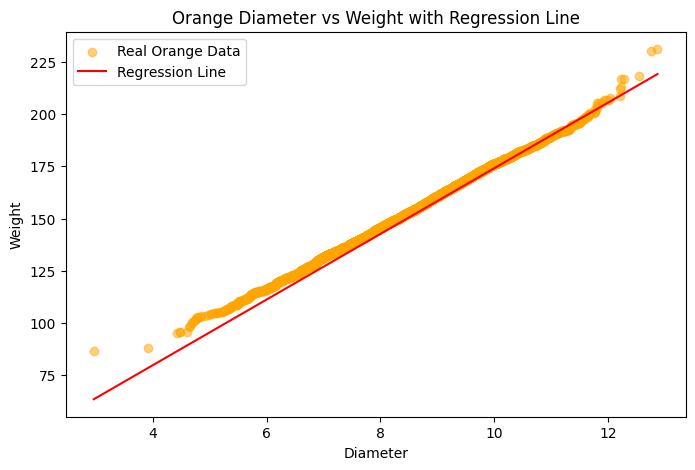

In [69]:
# Using the slope and intercept to calculate **predicted weights** (`Y_pred`) for each diameter.
Y_pred_orange = a_orange * X_orange + b_orange

# Plotting results
plt.figure(figsize=(8,5))
plt.scatter(X_orange, Y_orange, color='orange', alpha=0.5, label='Real Orange Data')

plt.plot(X_orange, Y_pred_orange, color='red', label='Regression Line')
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.title('Orange Diameter vs Weight with Regression Line')
plt.legend()
plt.show()